# Classification - k-nearest-neighbors - Education Attainment

In [10]:
# Import feature subset with Education_Attainment Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import sys
sys.path.append('../resources')
from w6support import plot_2d_class

# Make sure the pic subdirectory exists
import os, errno
try:
    os.makedirs('pic')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string

In [12]:
originalDF = pd.read_csv('educationFeatureSubset.csv')
dfOHE = pd.read_csv('oheTransformedData.csv')
dfOHE['Education_Attainment'] = pd.Series(originalDF['Education_Attainment'], index=dfOHE.index)
dfOHE.fillna(0, inplace=True)

# Next we check the Education_Attainment options in the dataset for use with classification
print(dfOHE.Education_Attainment.unique())

# Now we replace those values with integers for use with the classification algorithm
education_values = {"Education_Attainment": {"Masters": 1, "Some_College": 2, "College": 3, "High_School": 4, "Professional": 5, "Grammar": 6, "Special": 7, "Doctoral": 8, "Other": 9}}
dfOHE.replace(education_values, inplace=True)

['Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other']


Years_on_Internet-0  Years_on_Internet-1  Years_on_Internet-2  \
0                  1.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  1.0                  0.0                  0.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   Years_on_Internet-3  Years_on_Internet-4  Web_Ordering-0  Web_Ordering-1  \
0                  0.0                  0.0             0.0             0.0   
1                  0.0                  1.0             0.0             0.0   
2                  0.0                  0.0             0.0             0.0   
3                  0.0                  0.0             0.0             0.0   
4                  0.0                  0.0             0.0             0.0   

   Web_Ordering-2  Not_Purchasing_Privacy  Not_Purchasing_Prefer_people  \
0             1.0                     0.0                           0.0   
1             1.0                     0.0                           0.0   
2             1.0                     0.0                           0.0   
3             1.0                     0.0                           0.0   
4             1.0                     0.0                           0.0   

   Not_Purchasing_Too_complicated  Not_Purchasing_Easier_locally  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   Not_Purchasing_Security   Age  Education_Attainment  
0                      0.0  41.0                     1  
1                      0.0  28.0                     2  
2                      0.0  25.0                     3  
3                      0.0  28.0                     3  
4                      0.0  17.0                     4

In [13]:
X, y = dfOHE.loc[:, dfOHE.columns != 'Education_Attainment'], dfOHE['Education_Attainment']

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

With knn, you can determine membership probabilities for each of the 3 labels. As you can see, the predict() function just picks the most likely label.

In [15]:
# What kind of occupation has years on internet (1-3), web ordering (yes),Not_Purchasing_Security, age(50) 
# call the "predict" method:
result = knn.predict([[1,0,0,0,0,1,0,0,0,0,0,0,1,50],])

for key, val in education_values['Education_Attainment'].items():
    if val == result:
        print(key)

Masters


In [16]:
knn.predict_proba([[1,0,0,0,0,1,0,0,0,0,0,0,1,50],]) 

array([[0.4, 0.2, 0.2, 0. , 0. , 0.2, 0. , 0. , 0. ]])

In the next block of code, we take each pair of predictors and use the k-nearest-neighbour algorithm with k=3,5,7. 

Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet1.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet2.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet3.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet4.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering0.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering1.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering2.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPrivacy.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPreferPeople.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingTooComplicated.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingEasier

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPreferPeople_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingTooComplicated_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingTooComplicated_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingTooComplicated_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingEasierLocally_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingEasierLocally_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingSecurity_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering1_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPrivacy_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingPreferPeople_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingTooComplicated_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingTooComplicated_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingTooComplicated_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingEasierLocally_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingEasierLocally_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_NotPurchasingSecurity_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet0_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet3_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_YearsOnInternet4_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering0_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering0_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering0_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering1_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_WebOrdering2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPrivacy_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingPreferPeople_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingTooComplicated_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingTooComplicated_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingTooComplicated_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingEasierLocally_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingEasierLocally_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_7_nearest-neighbours_Occupation_NotPurchasingSecurity_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


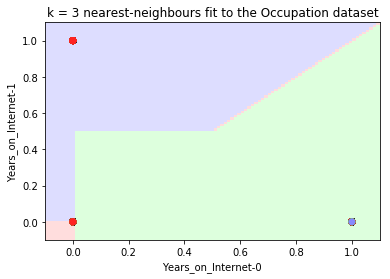

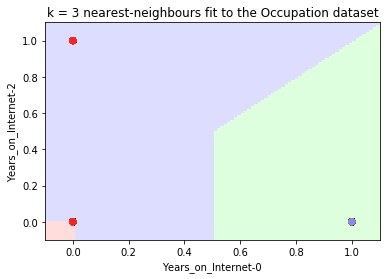

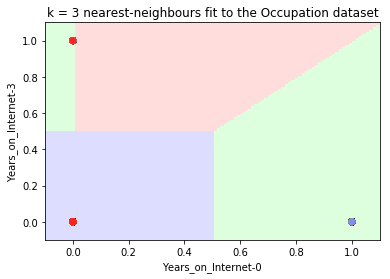

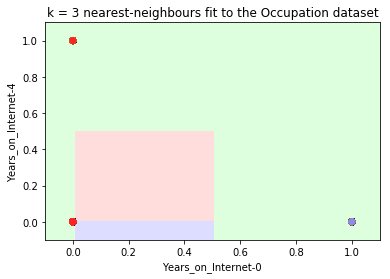

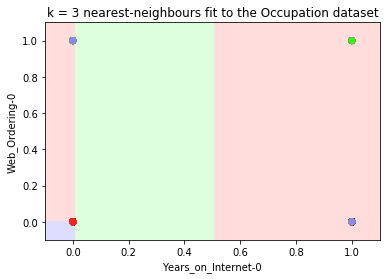

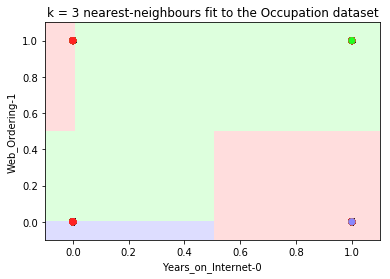

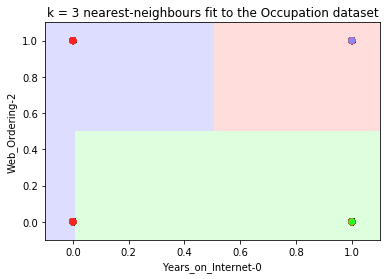

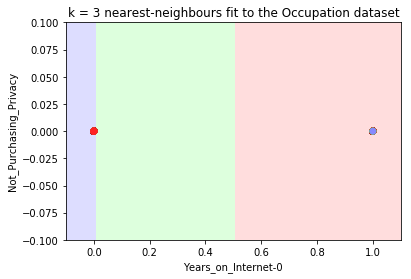

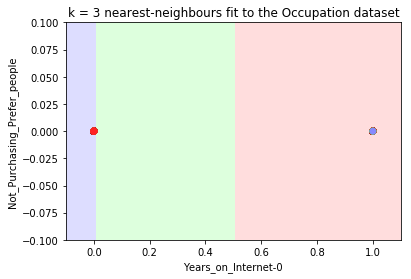

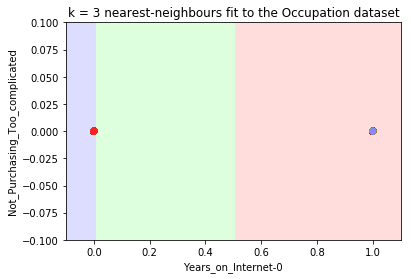

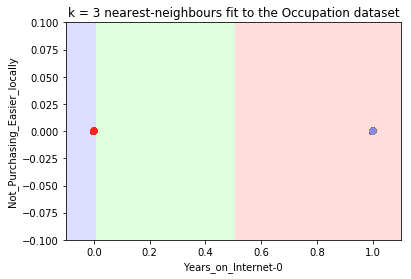

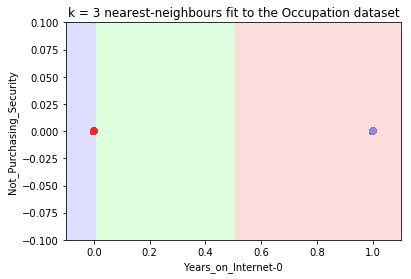

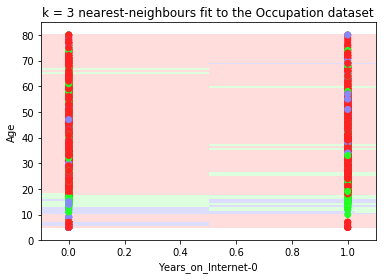

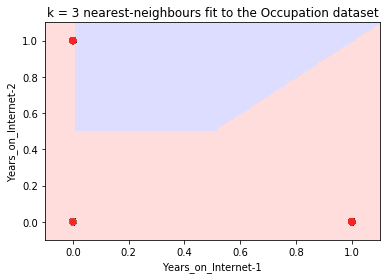

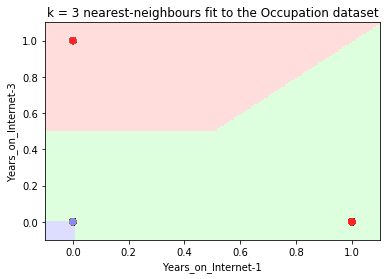

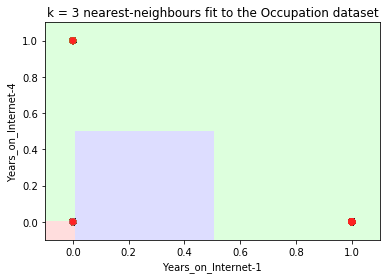

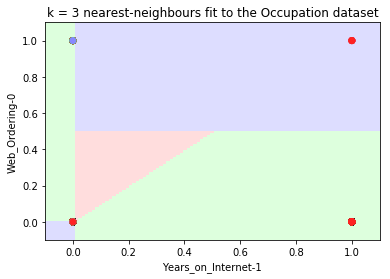

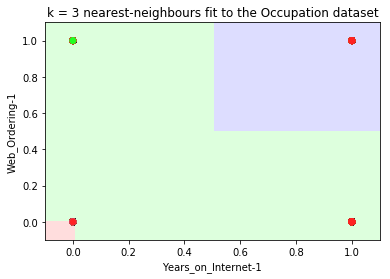

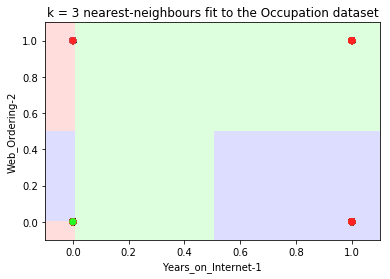

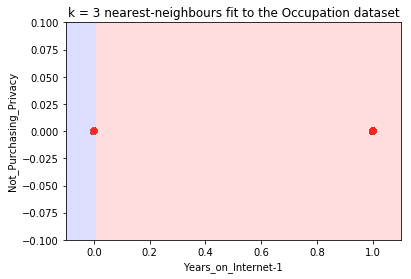

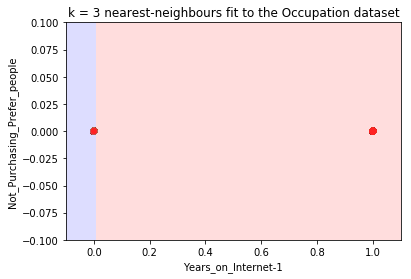

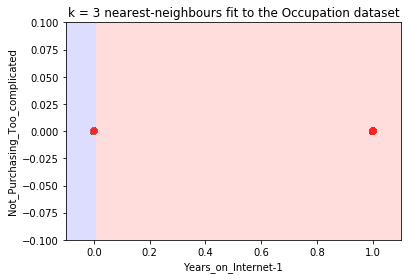

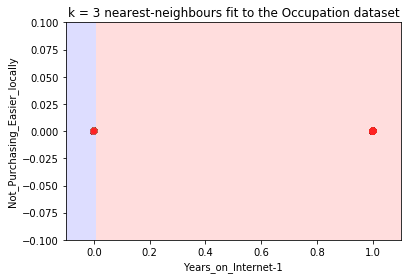

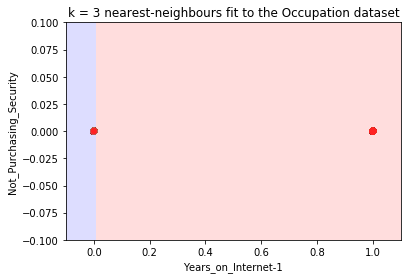

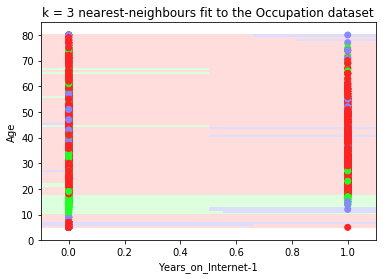

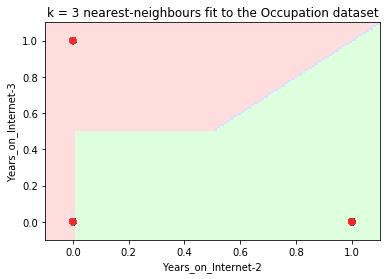

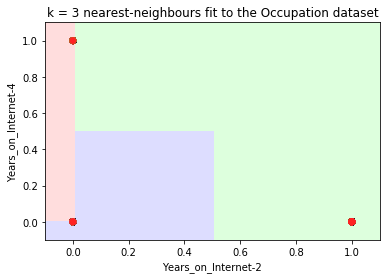

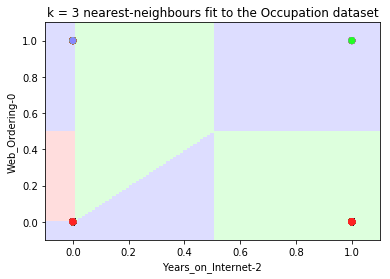

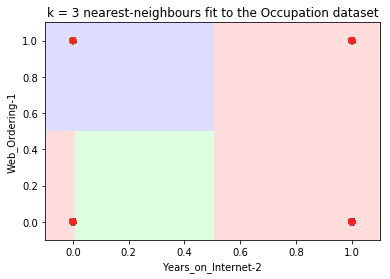

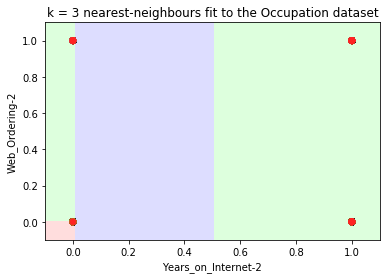

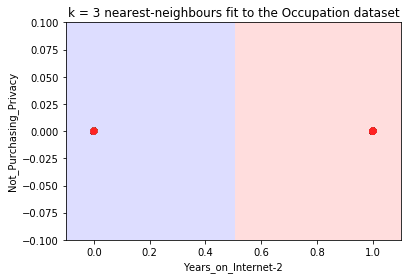

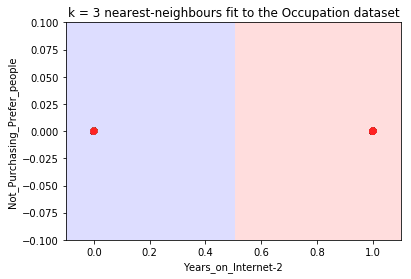

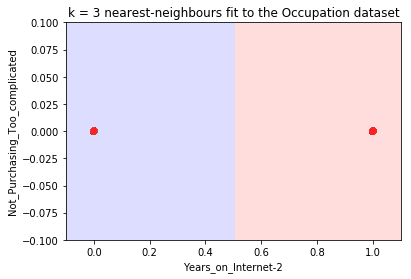

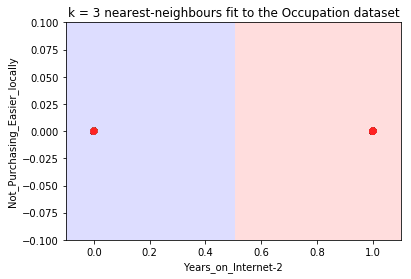

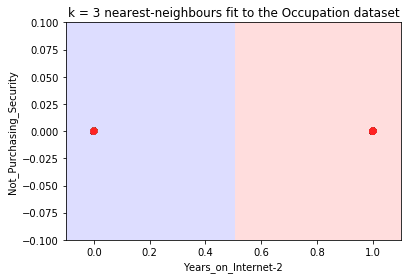

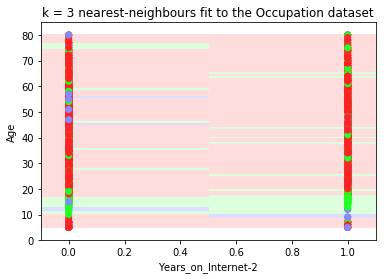

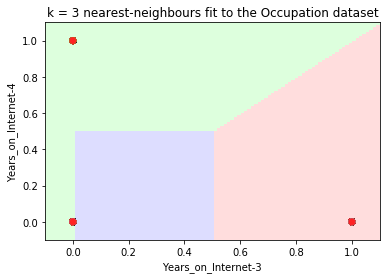

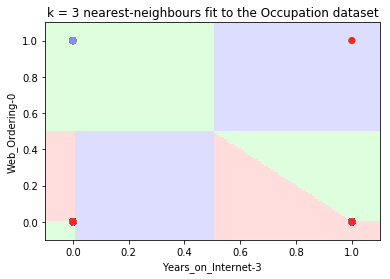

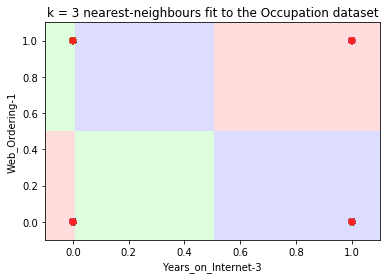

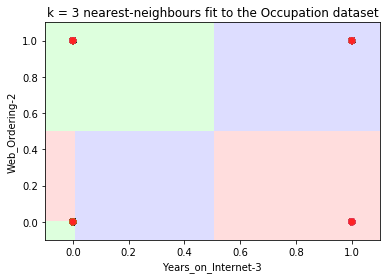

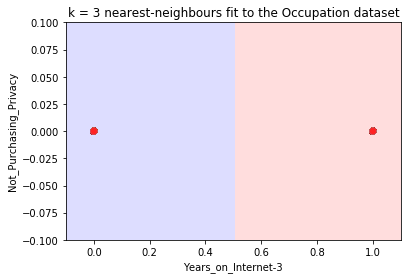

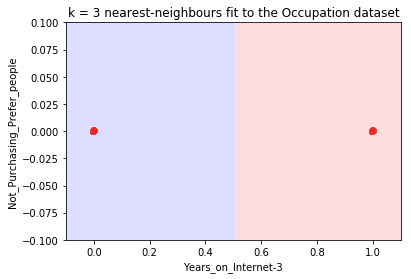

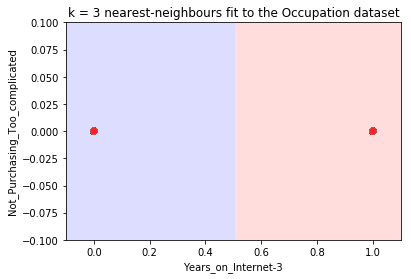

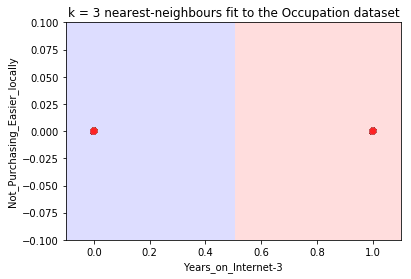

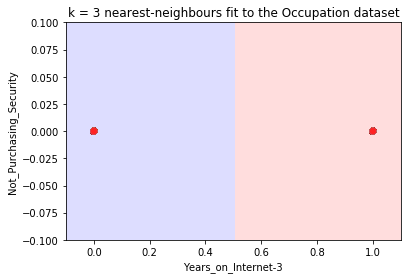

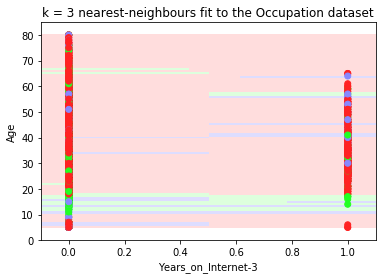

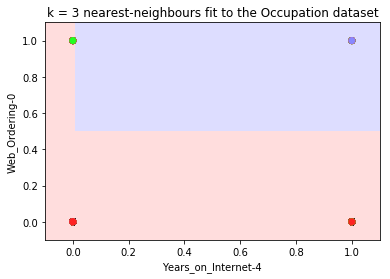

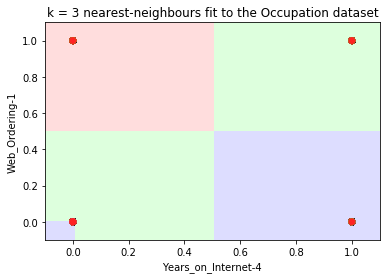

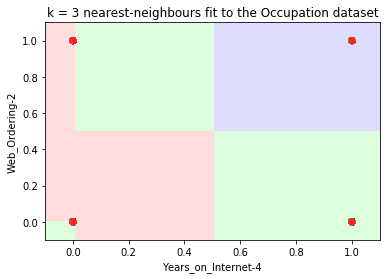

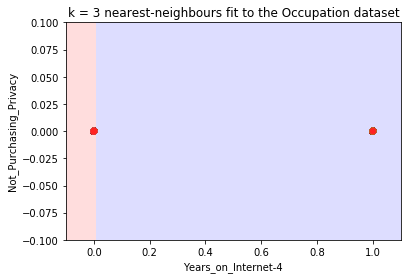

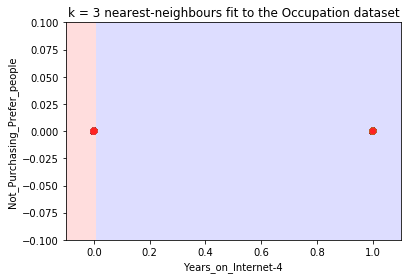

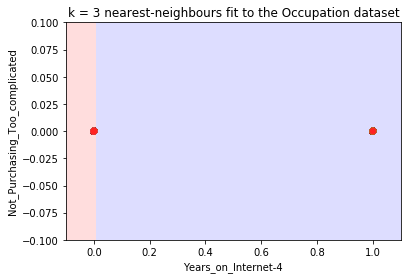

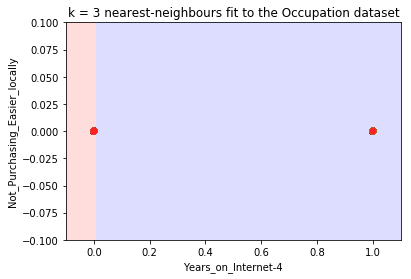

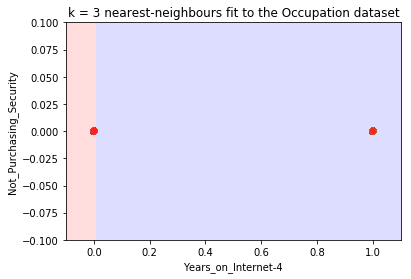

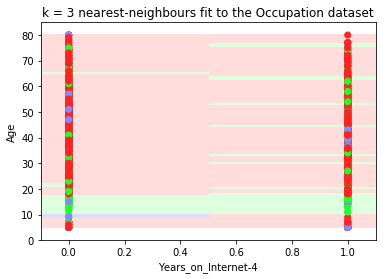

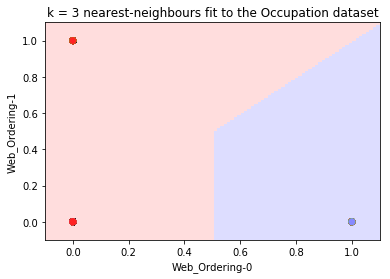

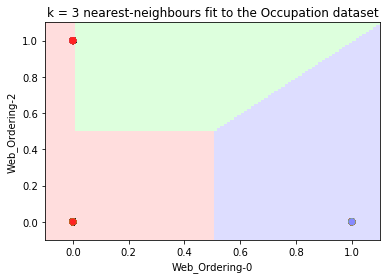

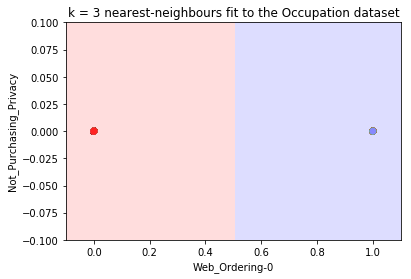

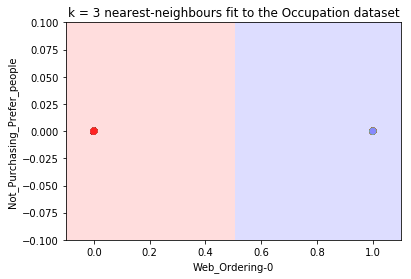

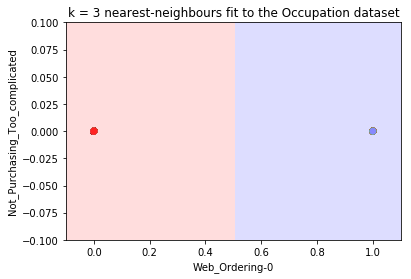

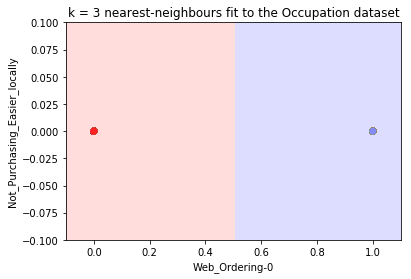

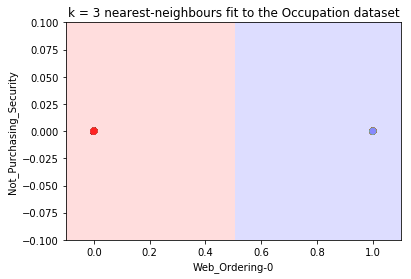

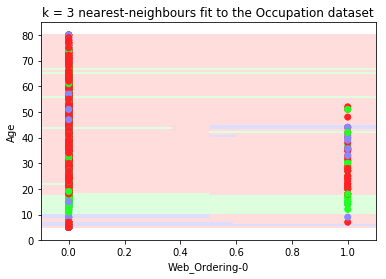

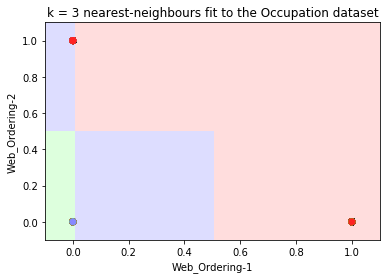

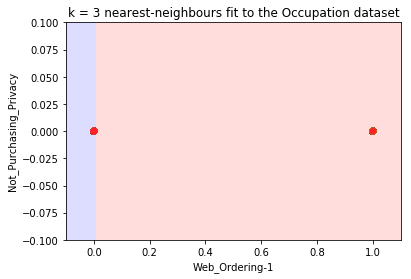

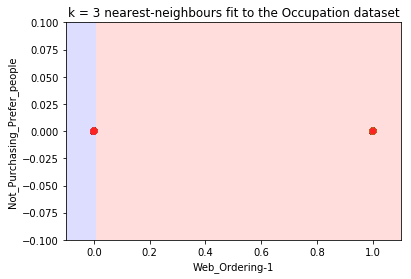

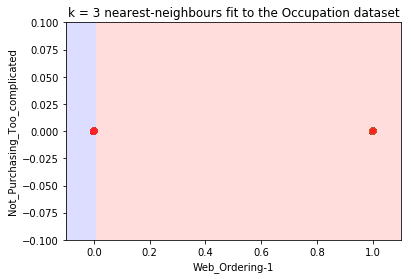

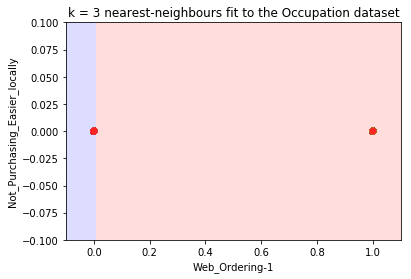

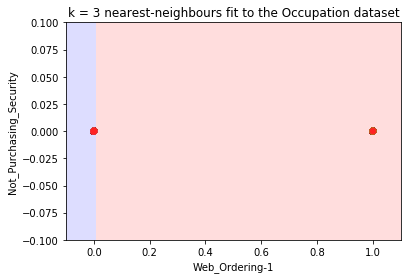

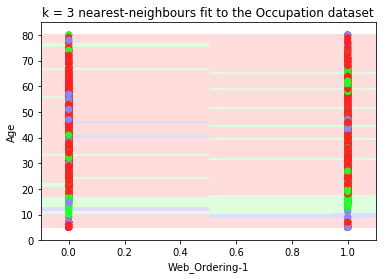

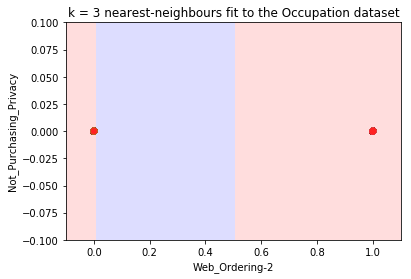

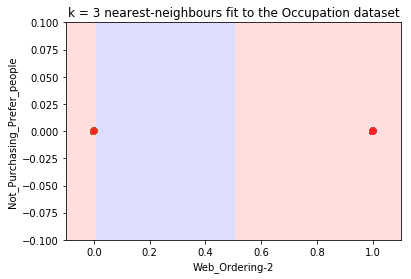

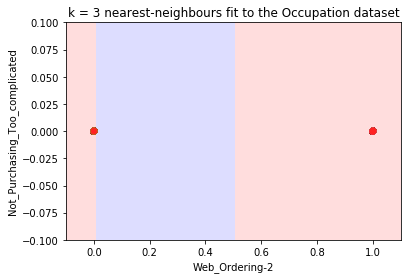

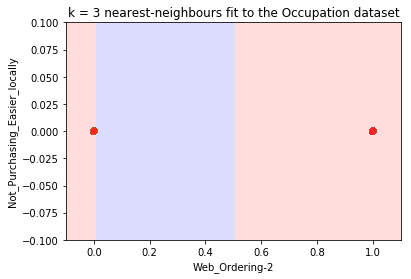

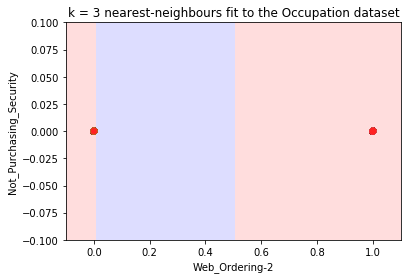

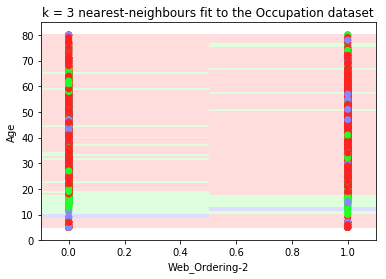

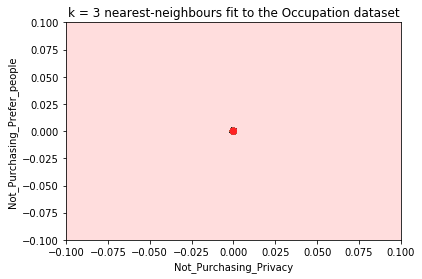

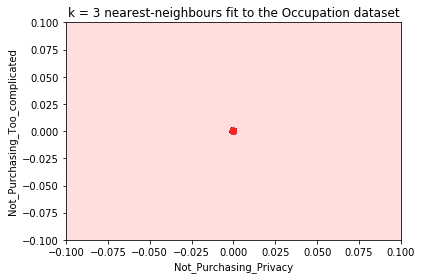

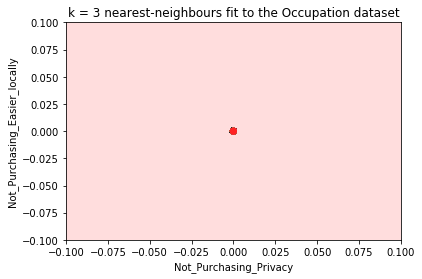

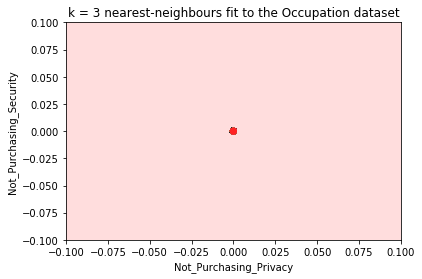

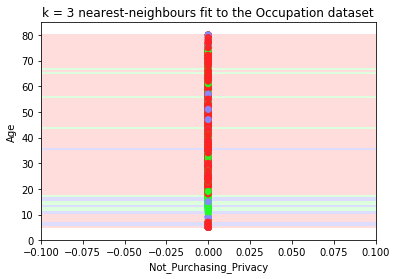

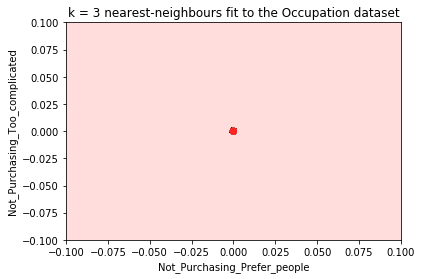

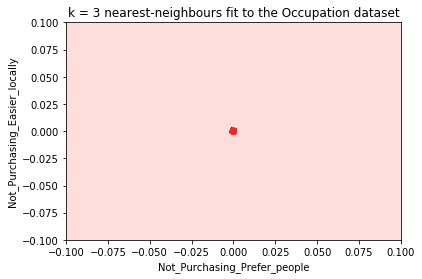

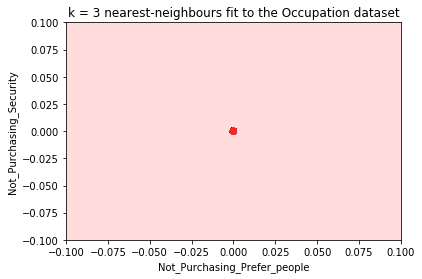

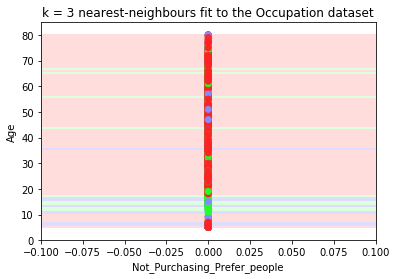

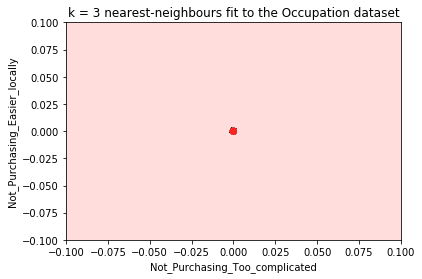

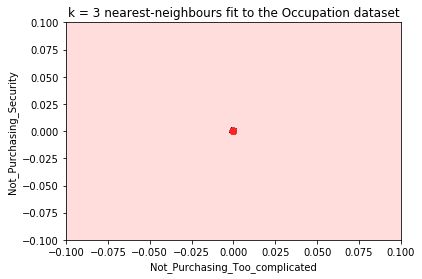

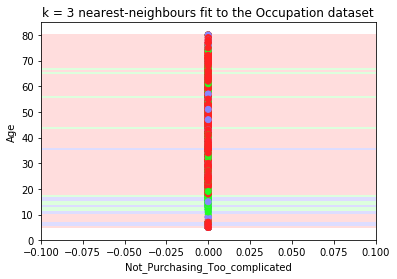

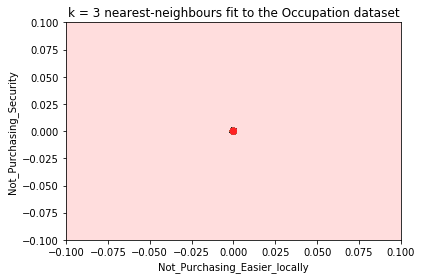

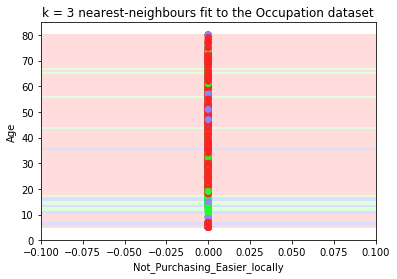

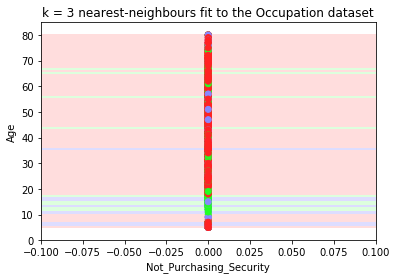

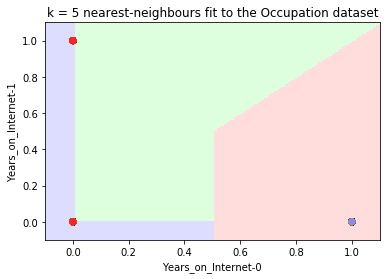

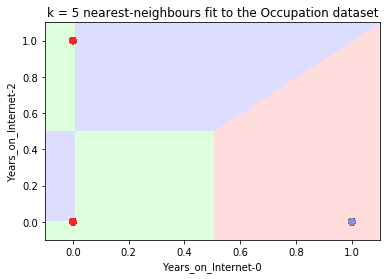

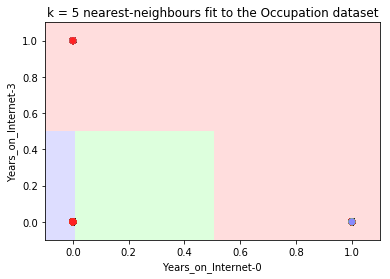

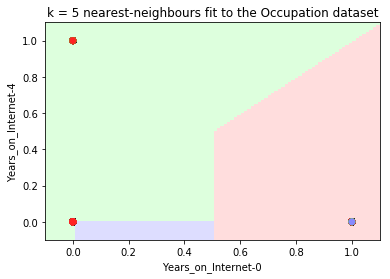

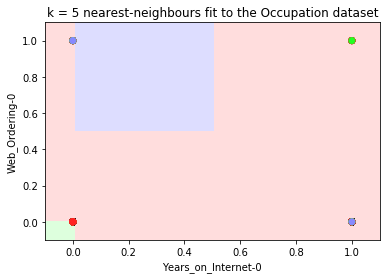

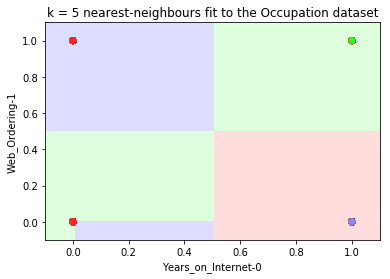

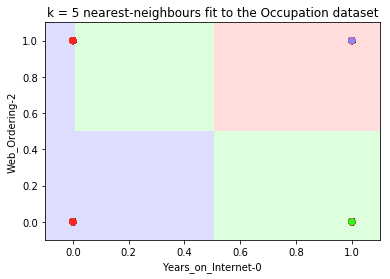

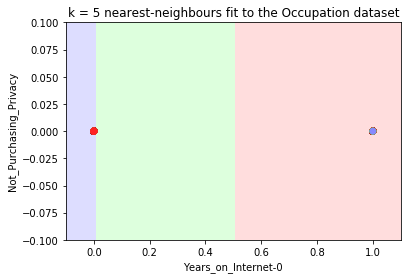

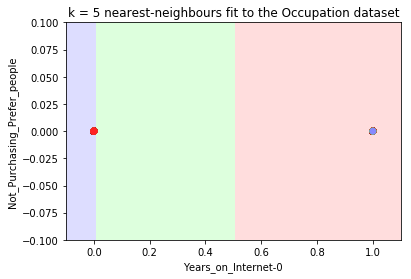

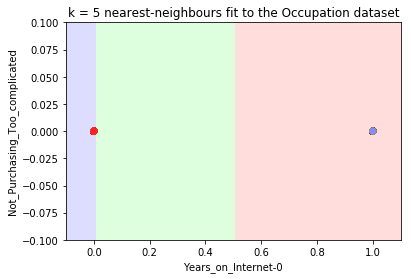

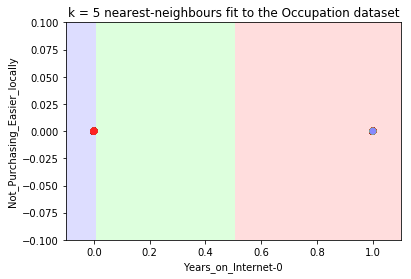

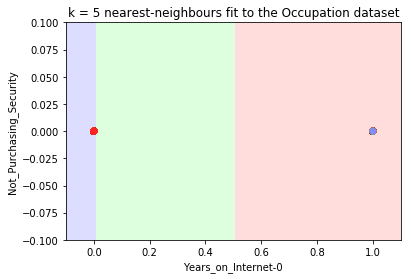

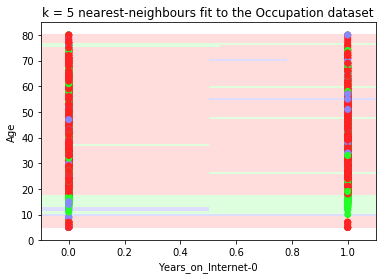

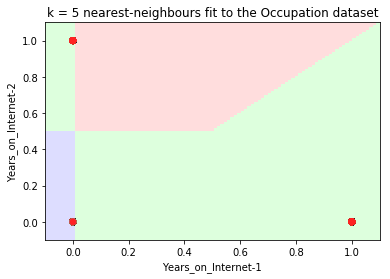

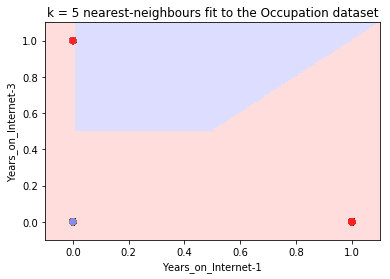

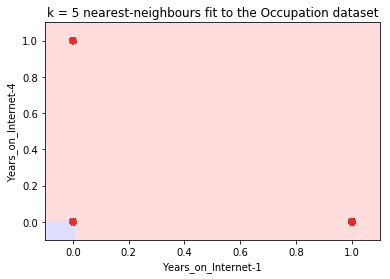

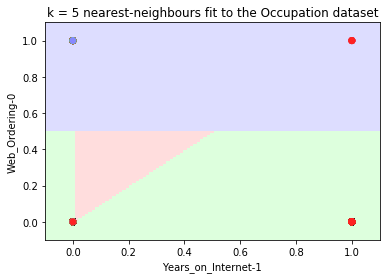

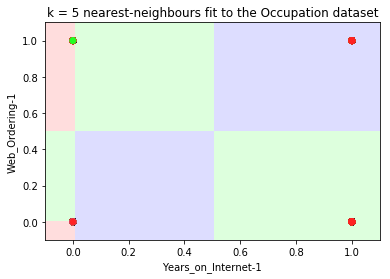

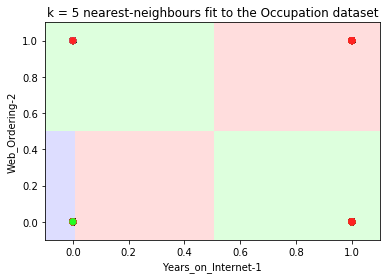

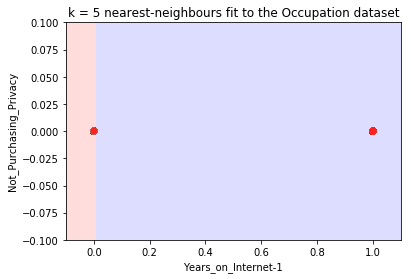

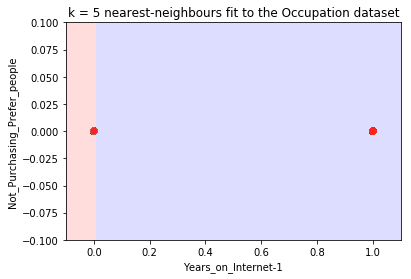

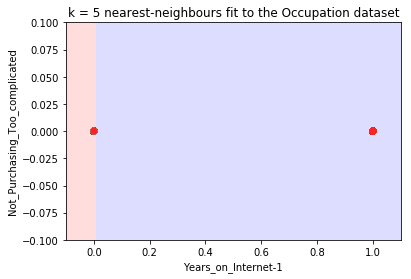

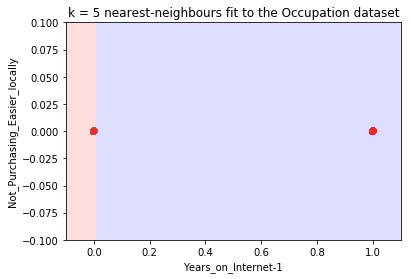

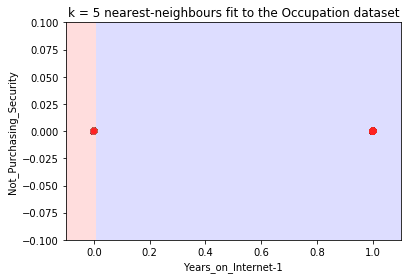

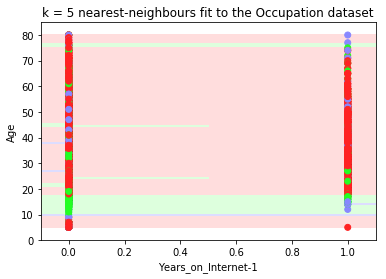

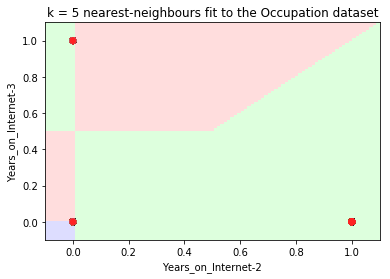

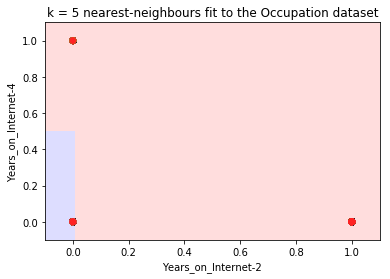

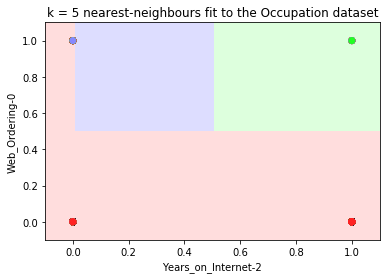

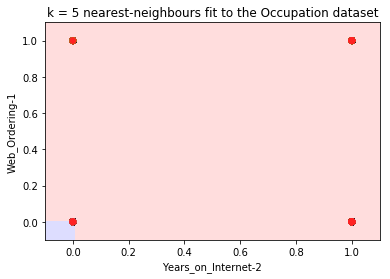

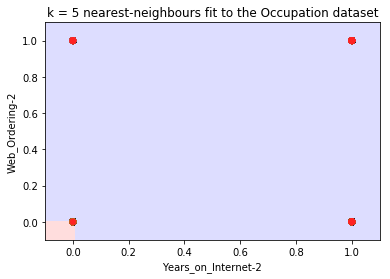

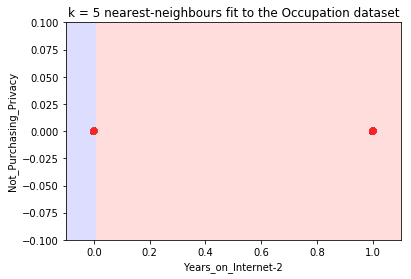

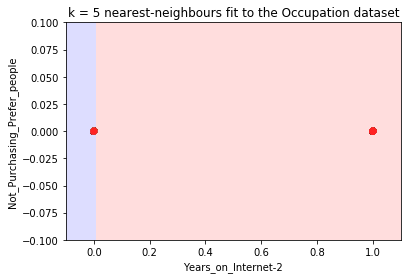

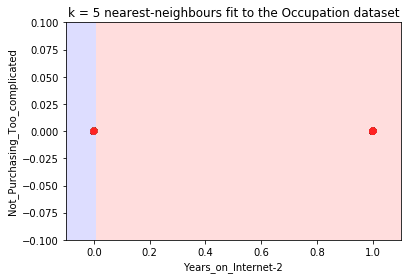

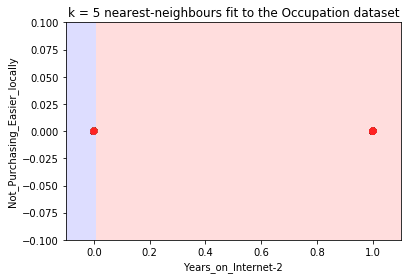

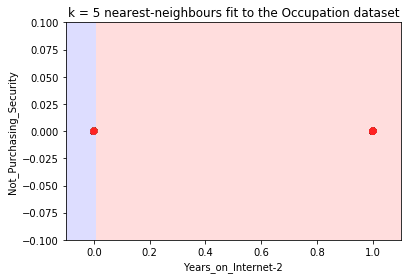

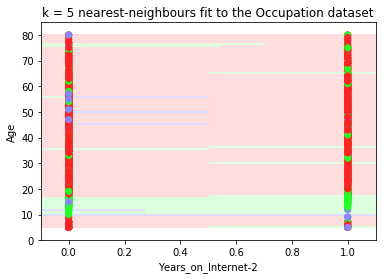

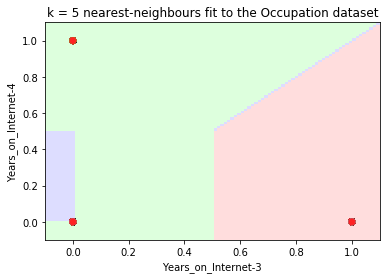

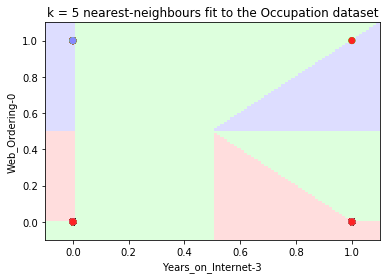

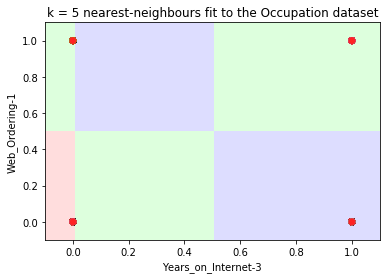

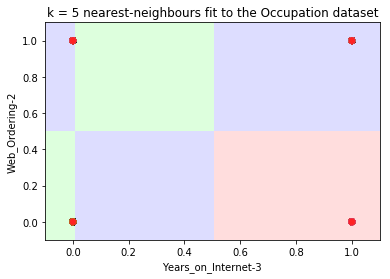

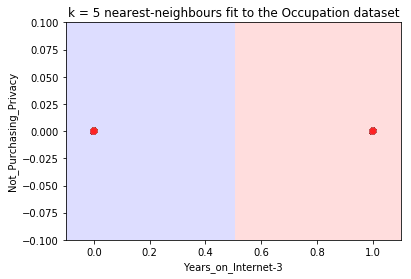

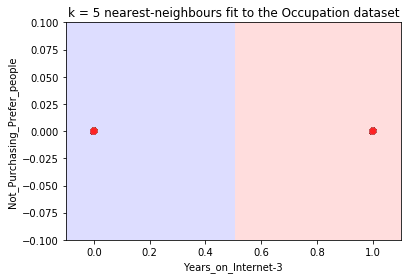

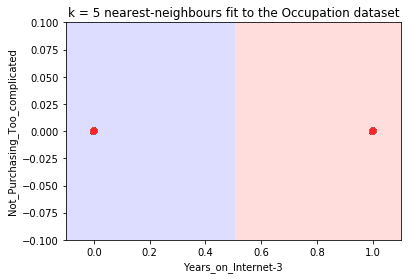

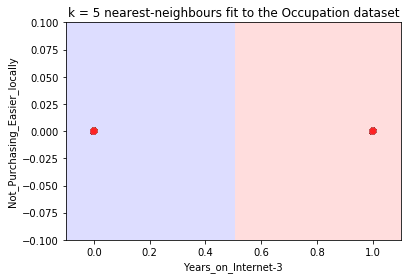

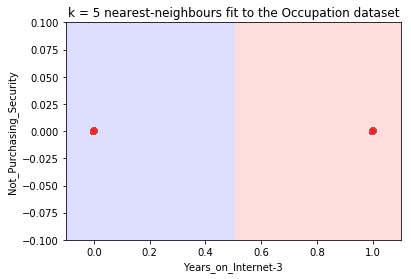

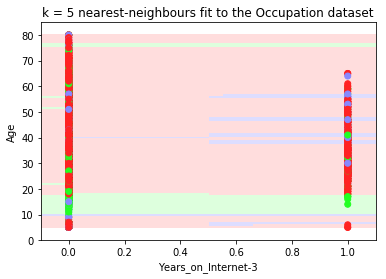

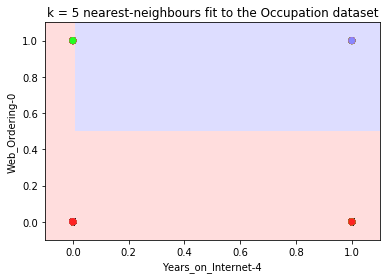

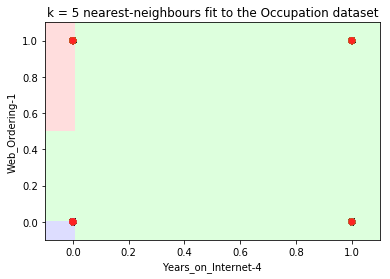

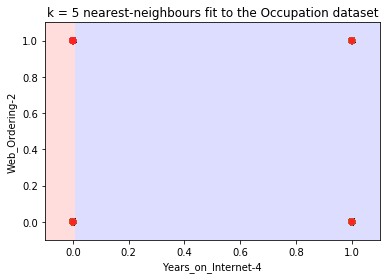

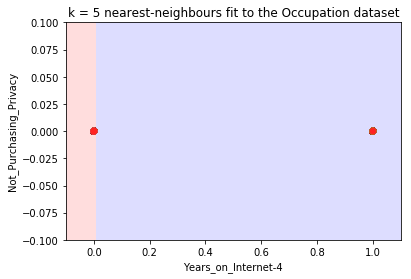

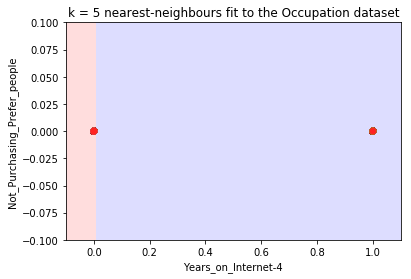

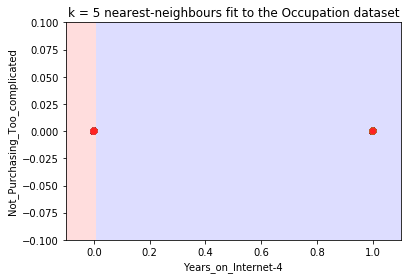

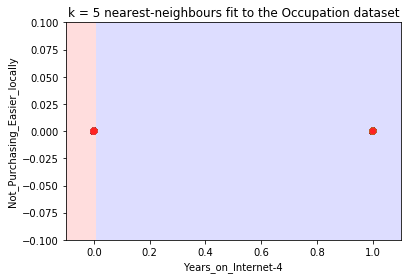

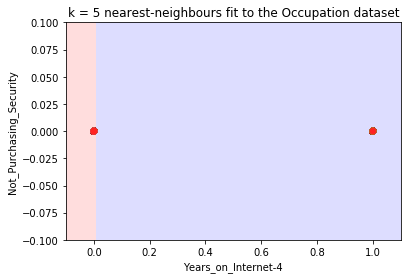

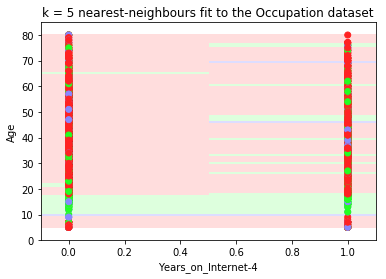

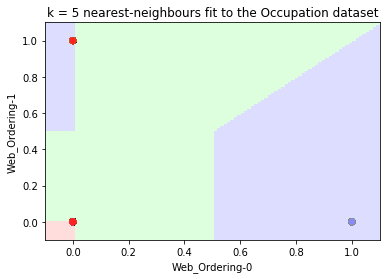

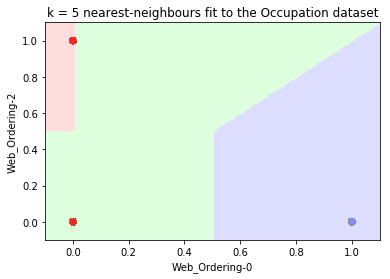

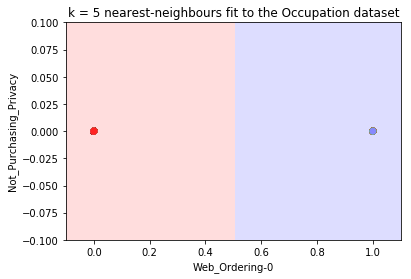

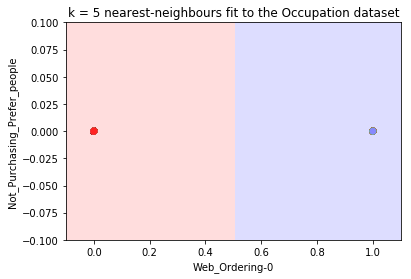

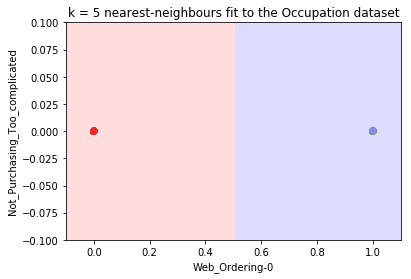

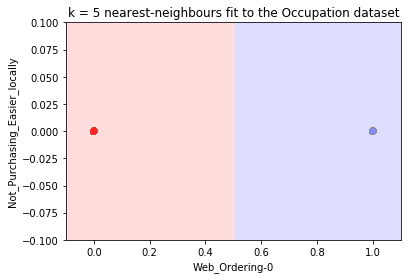

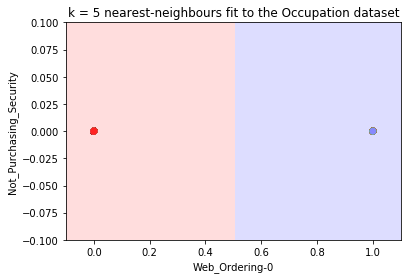

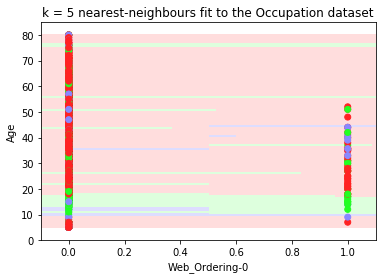

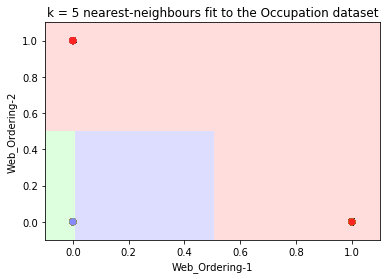

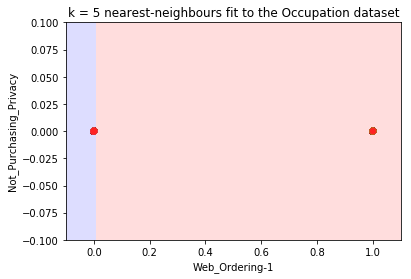

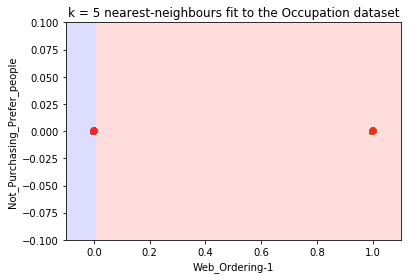

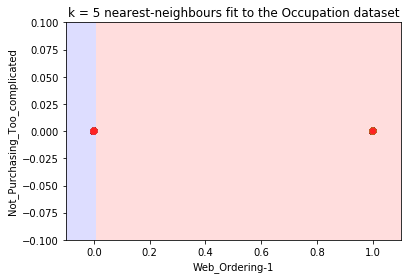

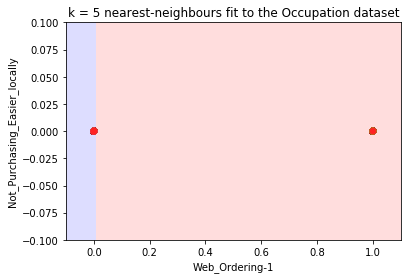

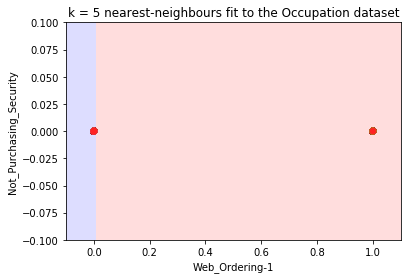

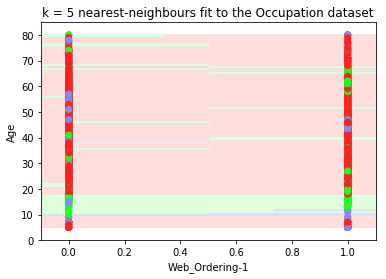

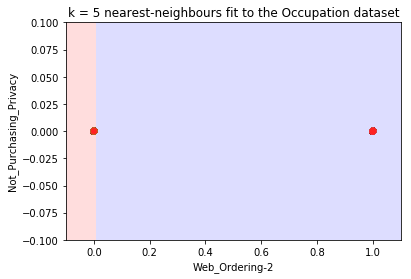

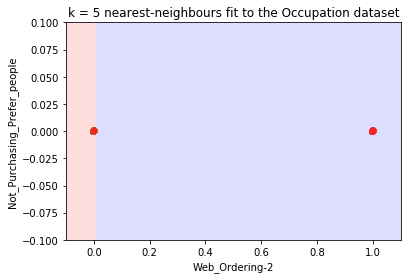

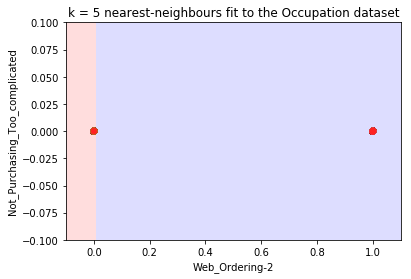

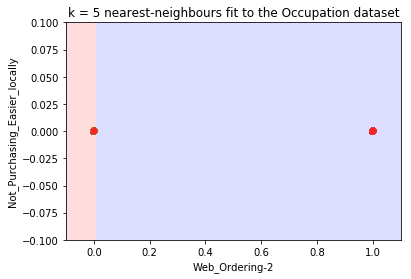

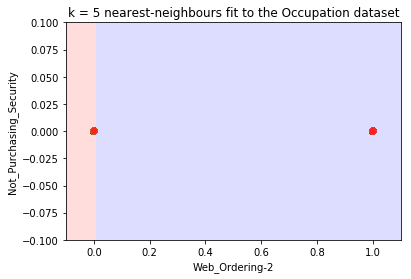

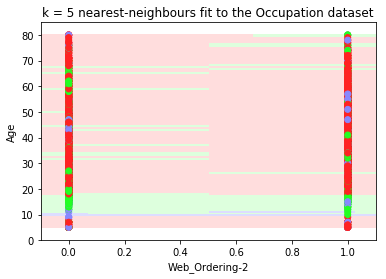

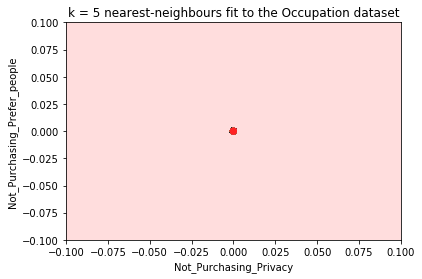

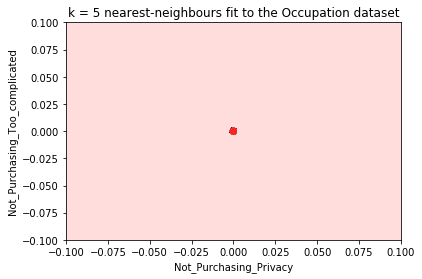

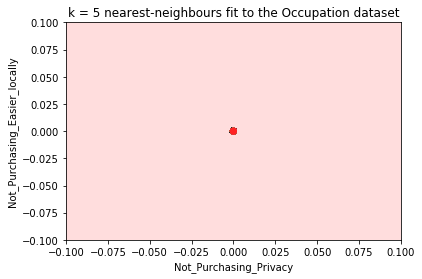

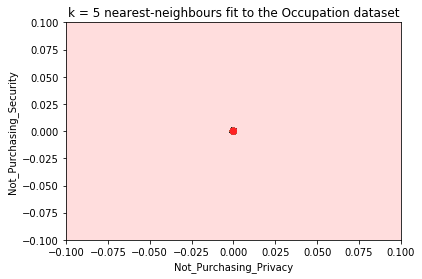

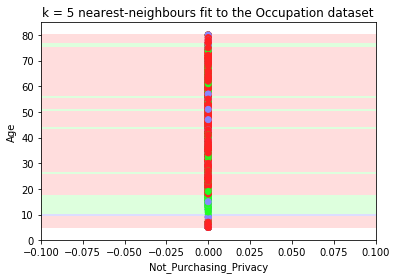

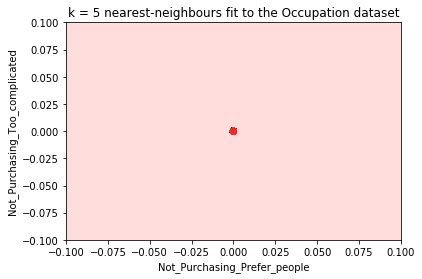

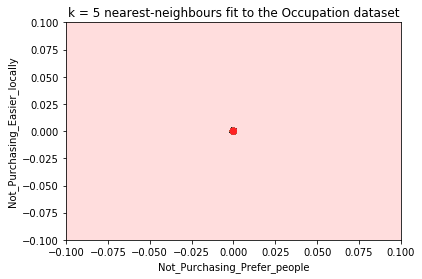

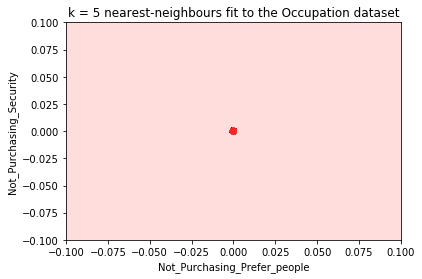

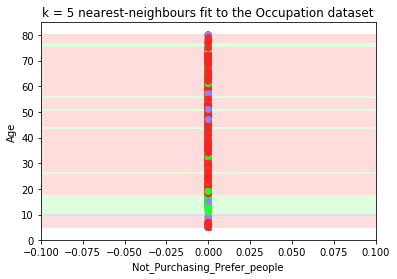

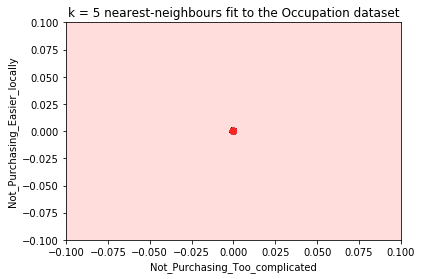

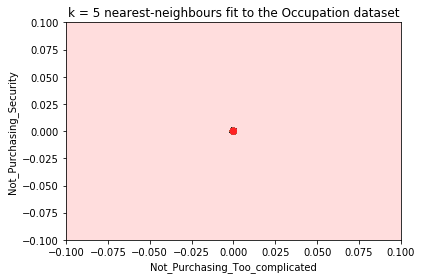

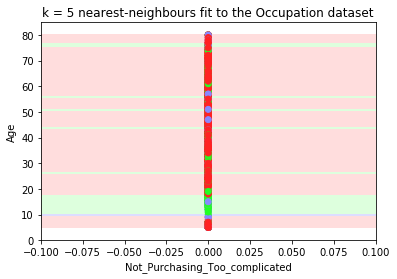

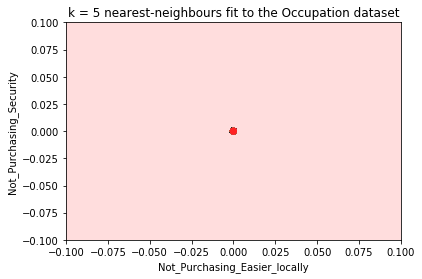

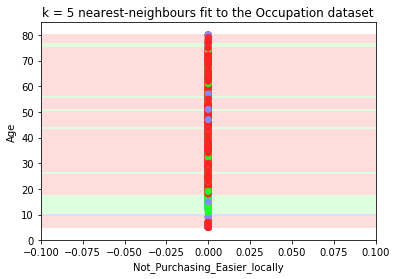

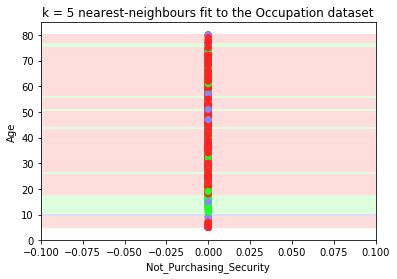

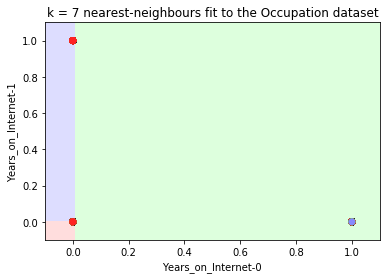

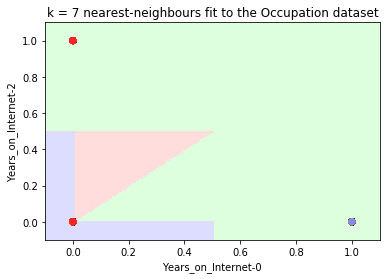

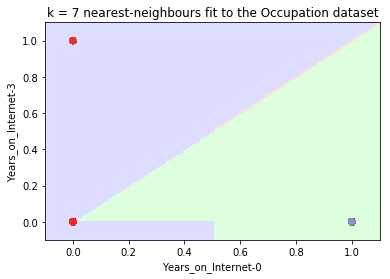

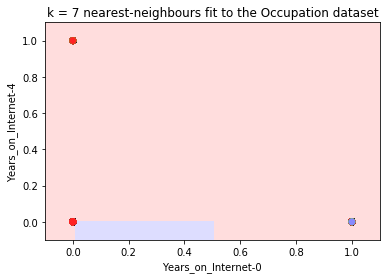

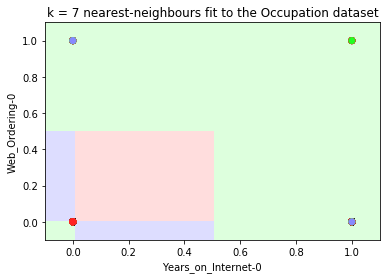

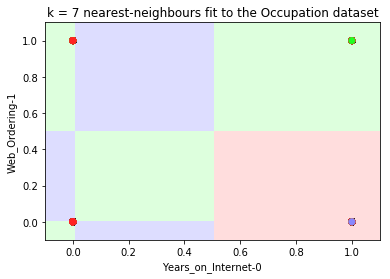

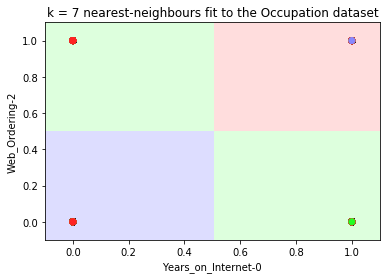

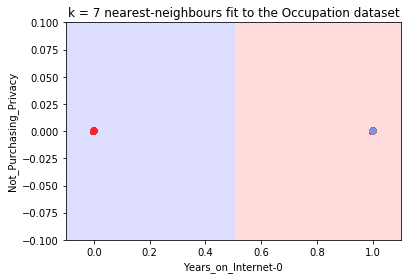

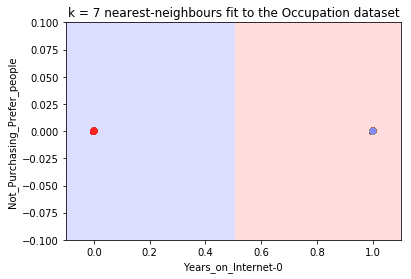

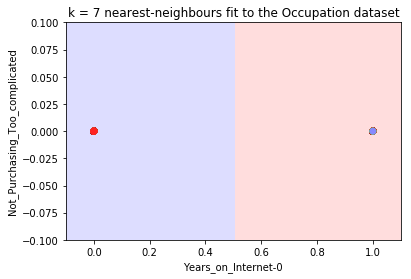

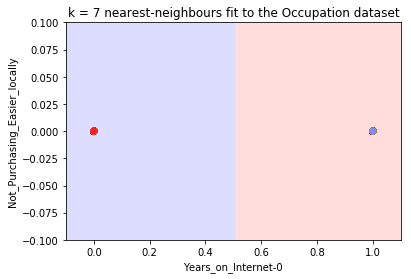

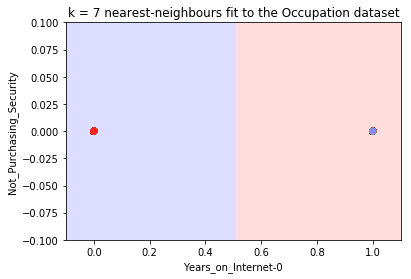

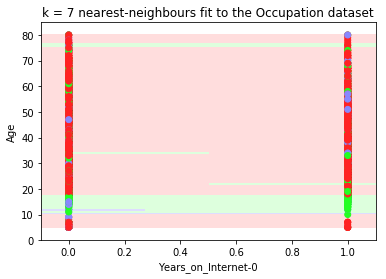

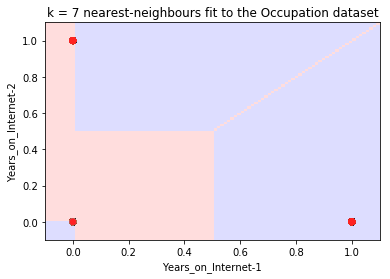

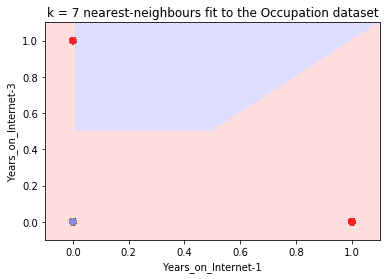

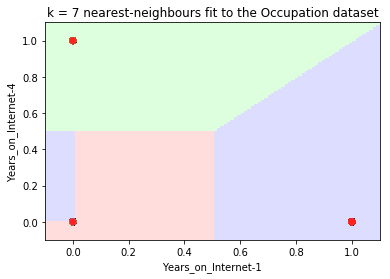

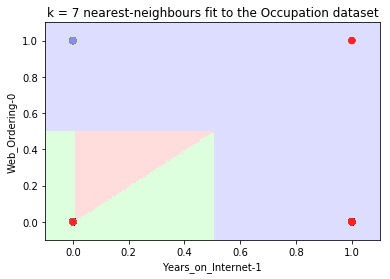

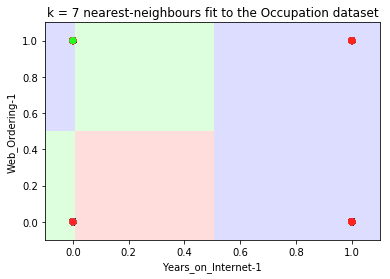

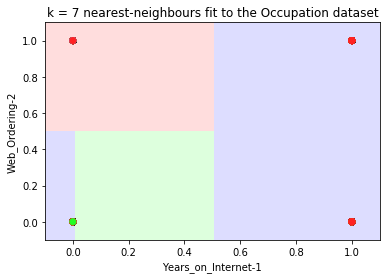

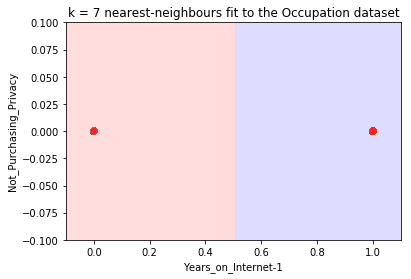

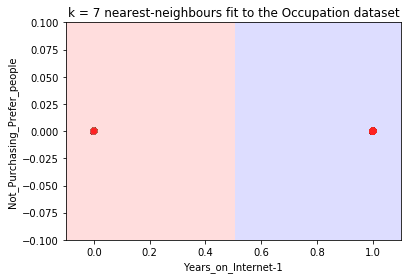

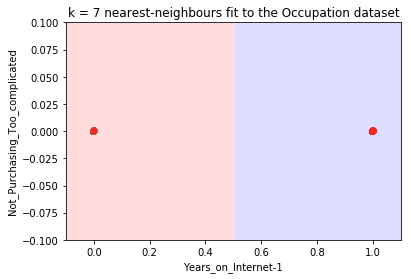

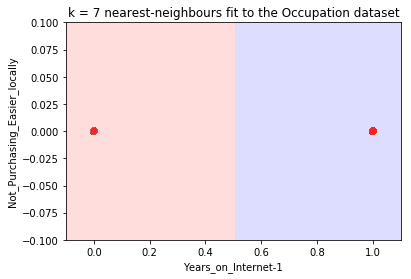

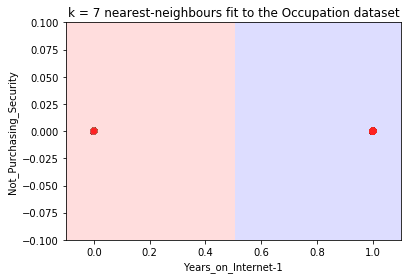

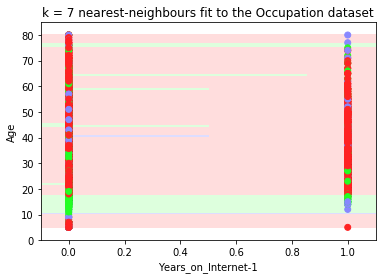

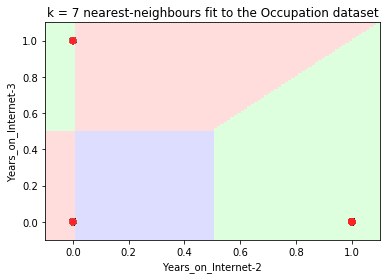

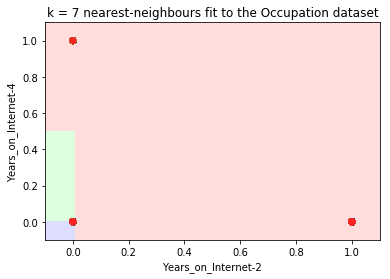

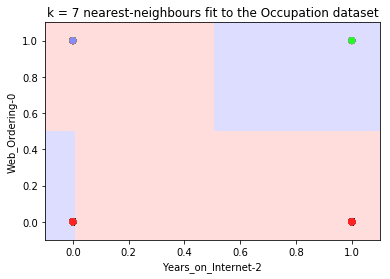

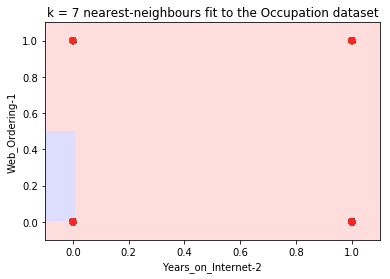

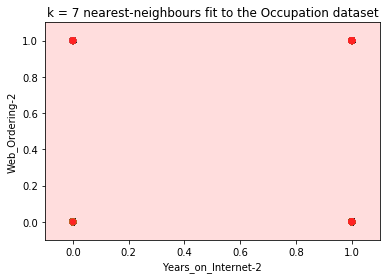

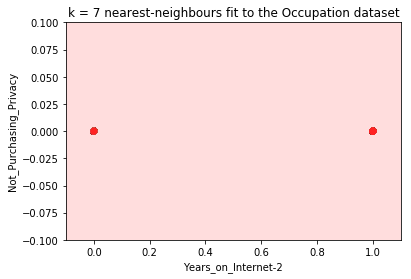

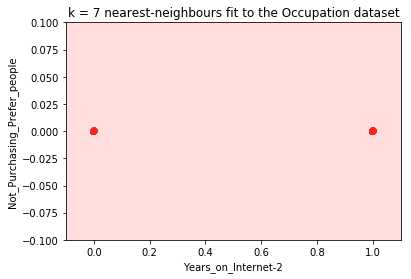

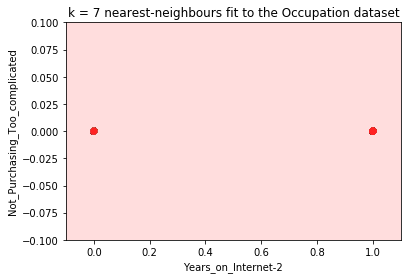

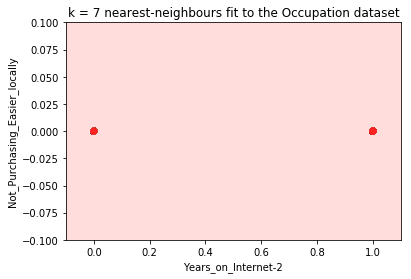

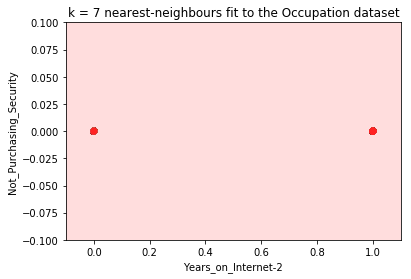

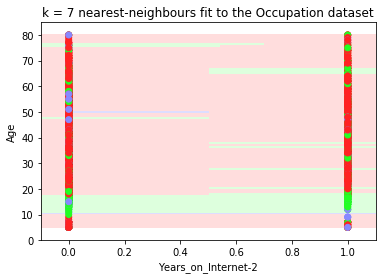

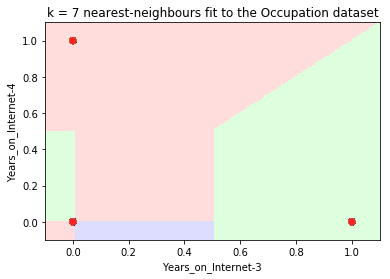

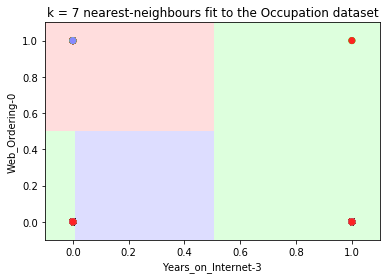

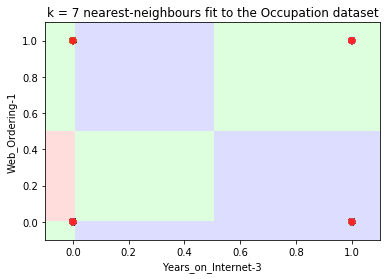

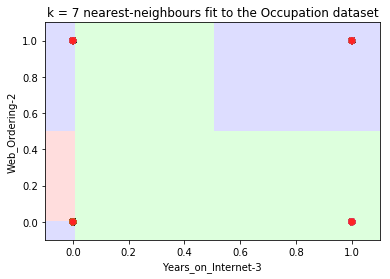

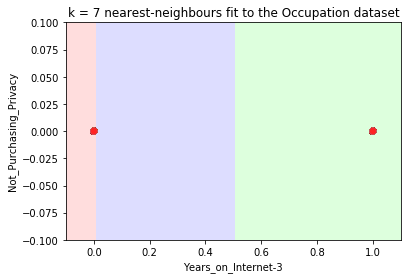

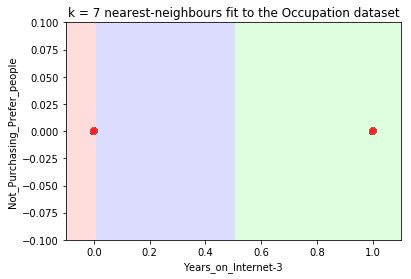

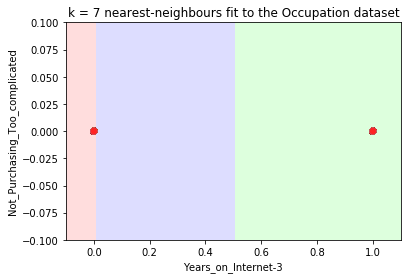

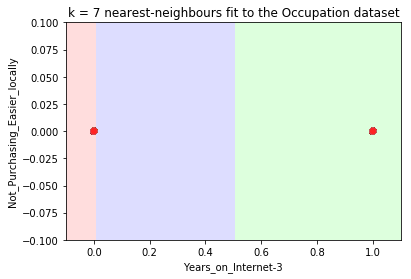

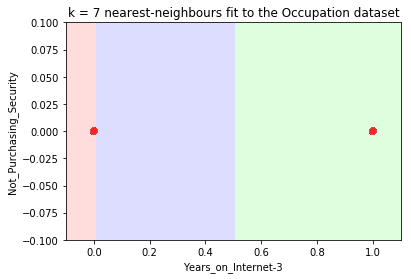

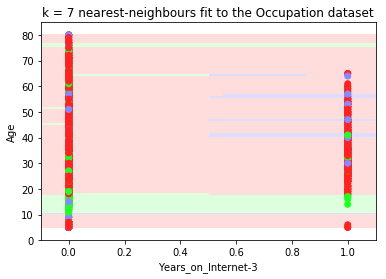

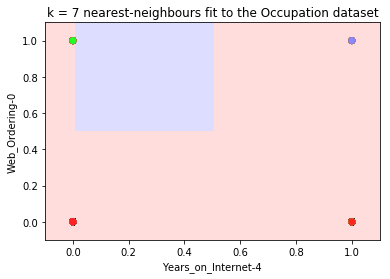

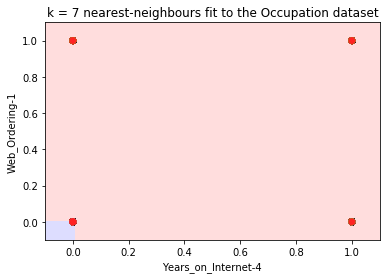

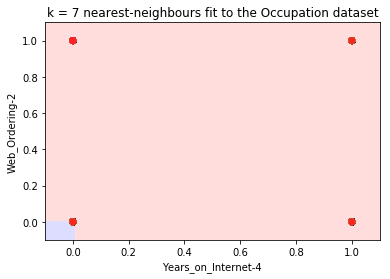

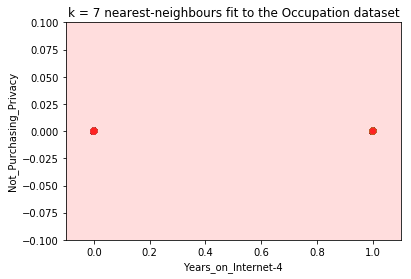

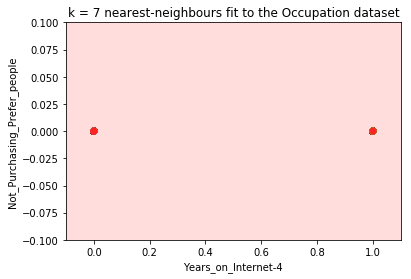

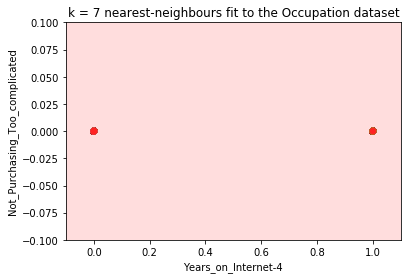

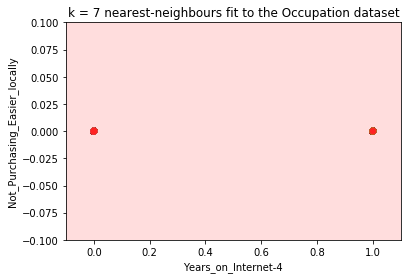

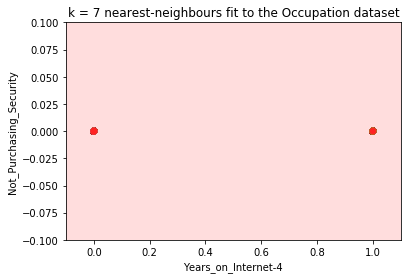

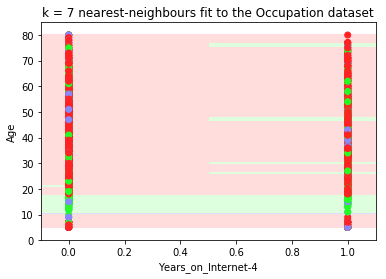

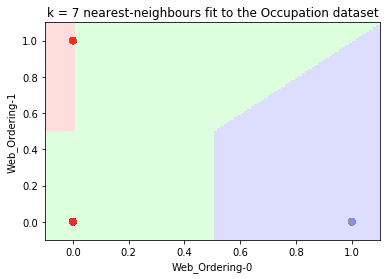

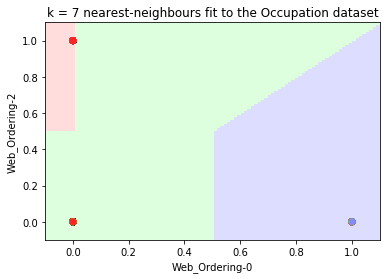

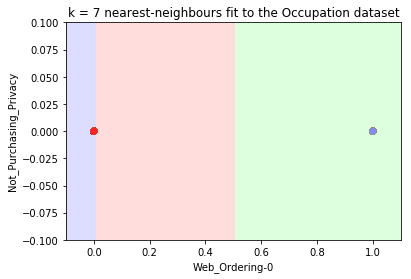

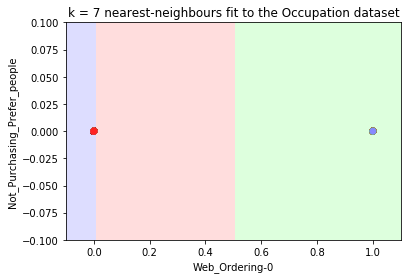

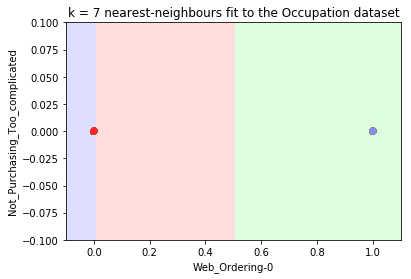

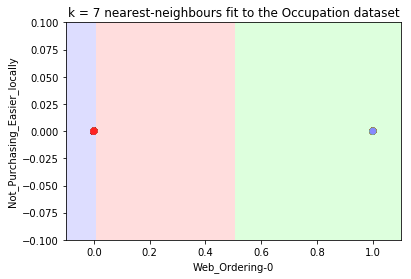

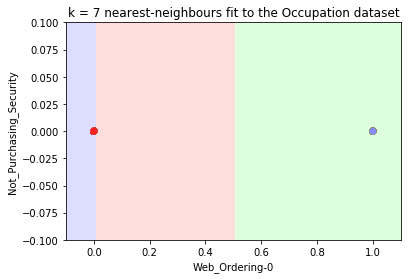

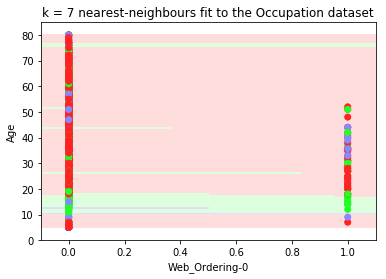

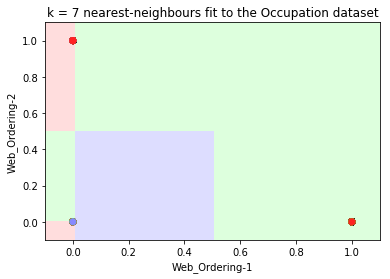

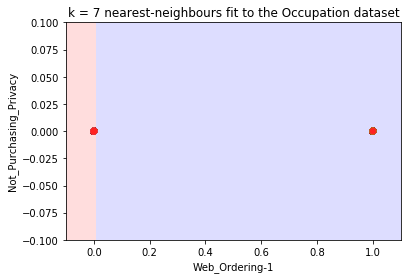

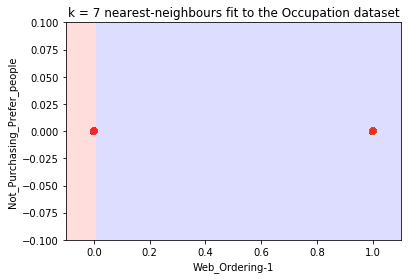

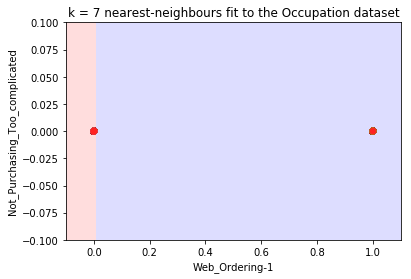

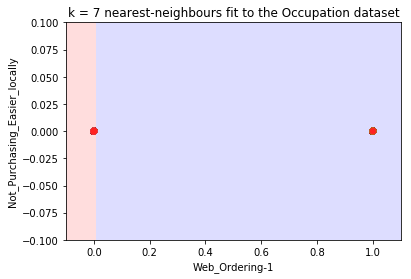

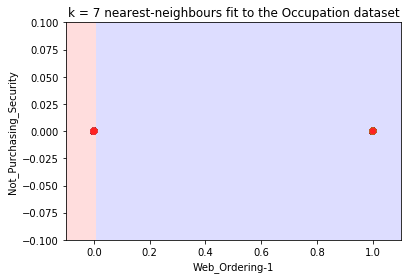

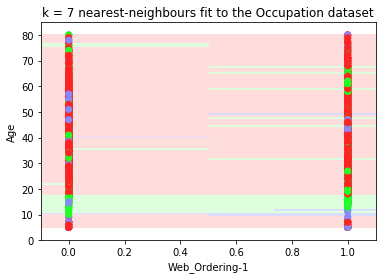

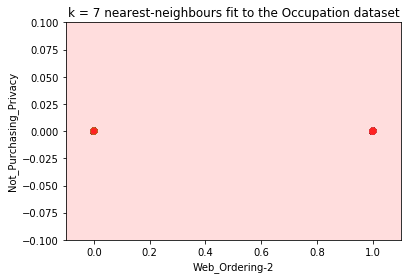

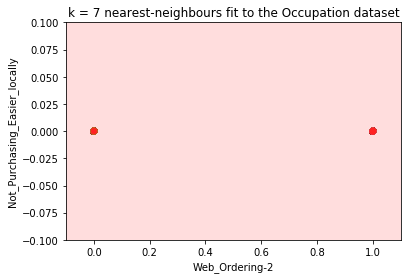

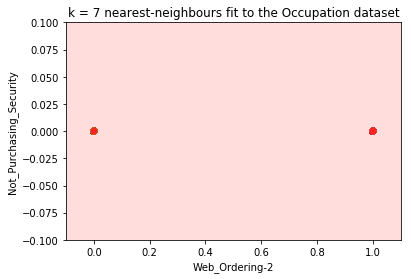

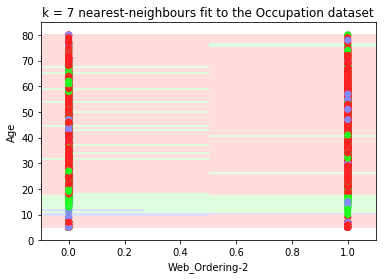

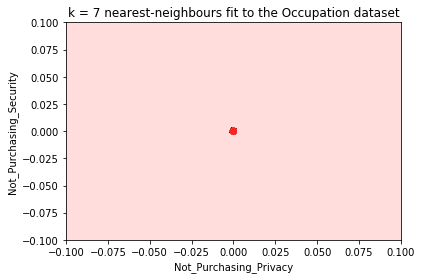

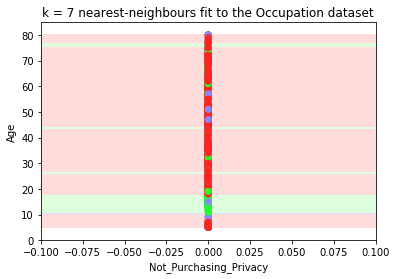

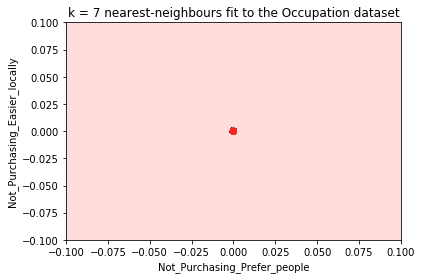

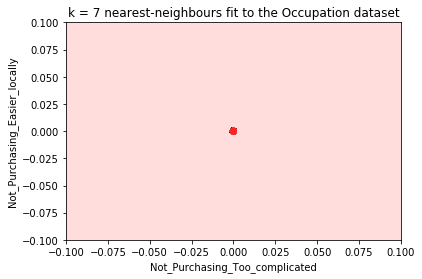

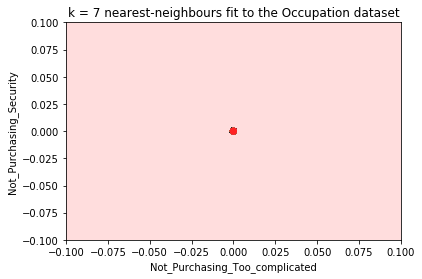

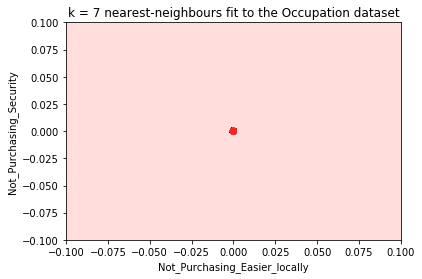

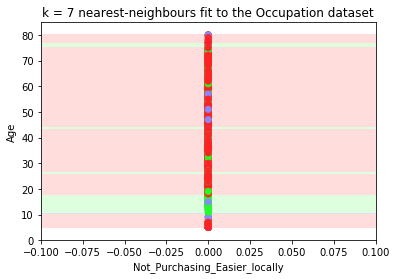

In [17]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

#predNames = list(iris.data) # https://stackoverflow.com/a/19483025, except iris.data is an array, not a dataframe
predNames = list(dfOHE.columns[dfOHE.columns != 'Education_Attainment'])

df=pd.DataFrame(dfOHE, columns=predNames)
nTrain = df.shape[0]
y = dfOHE['Education_Attainment']

pattern = re.compile('[\W_]+', re.UNICODE) # https://stackoverflow.com/a/1277047
for neighborCnt in range(3,8,2): # from 3 to a maximum of 8, in steps of 2, so 3,5,7
  knn = neighbors.KNeighborsClassifier(n_neighbors=neighborCnt)
  for twoCols in itertools.combinations(predNames, 2): # https://stackoverflow.com/a/374645
    X = df[list(twoCols)]  # we only take two features at a time
    colNames = X.columns
    c1 = colNames[:1][0] # first of 2
    c2 = colNames[-1:][0] # last of 2
    c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
    c2 = pattern.sub("",c2.title())
    knn.fit(X, y)
    plotTitle = "k = %i %s fit to the %s dataset" % (neighborCnt, "nearest-neighbours", "Occupation")
    fileTitle = "pic/k_%i_%s_%s_%s_%s.pdf" % (neighborCnt, "nearest-neighbours", "Occupation", c1, c2)
    print("Plotting file %s" % (fileTitle))
    plot_2d_class(X, y, nTrain, knn, plotTitle, fileTitle, cmap_light, cmap_bold)



## Model Validation

The k-nearest-neighbours classification "model" should be validated. Clearly, the parameter $k$ is critical to its performance. Generally, smaller values of $k$ fit the training set more accurately (less bias) but generalise less well to test data (more variance). The opposite applies to larger values of $k$.

With $k$ set to its minimum value ($k = 1$), it fits the training set exactly and the confusion matrix is optimal:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
X, y = dfOHE.loc[:, dfOHE.columns != 'Education_Attainment'], dfOHE['Education_Attainment']
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)
y_pred1 = knn1.predict(X)
print(np.all(y == y_pred1))

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y, y_pred1))

False
Accuracy: 0.3423031262366442


The *confusion matrix* highlights where classification differences arise, as these occur on the off-diagognal elements of the matrix:

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y, y_pred1))
print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred1, digits=3))

0.3423031262366442
[[ 268  352  504   91   23   14   75   56   21]
 [ 236 1472  727  482   53   46  165   48   62]
 [ 298  815 1107  256   50   23  164   68   36]
 [  72  423  192  378   24   69   41   11   36]
 [  35   70   86   26   23    3   16    5    7]
 [   7   18    9   55    0   96    2    0   14]
 [  41  153  118   77    5    3   45    8   10]
 [  35   52   90   10    5    1   14   46    2]
 [  12   33   31   34    1   14    7    6   25]]
              precision    recall  f1-score   support

           1      0.267     0.191     0.223      1404
           2      0.434     0.447     0.441      3291
           3      0.387     0.393     0.390      2817
           4      0.268     0.303     0.285      1246
           5      0.125     0.085     0.101       271
           6      0.357     0.478     0.409       201
           7      0.085     0.098     0.091       460
           8      0.185     0.180     0.183       255
           9      0.117     0.153     0.133       163

   mic

All 50 training samples for each class are identified correctly, as expected when $k = 1$ (accuracy score is 1, off-diagonal terms are 0, the classification report (relative to the trsining set) is "too good to be true"...

Note:

1. The _Recall_ of the $i^{\mbox{th}}$ predictor is $R_i \equiv c_{ii} / \sum_j c_{ij}$, which is the ratio of the $i^{\mbox{th}}$ diagonal element to the sum of the elements of the confusion matrix $C = \{c_{ij}\}$ in that _column_.
2. The _Precision_ of the $j^{\mbox{th}}$ predictor is $P_j \equiv c_{jj} / \sum_i c_{ij}$, which is the ratio of the $j^{\mbox{th}}$ diagonal element to the sum of the elements of the confusion matrix $C = \{c_{ij}\}$ in that _row_.
3. $F_1$-score is defined as $F_1 = 2\frac{R_i P_i}{R_i + P_i}$.

To test how the model generalizes to the training set, we hold back some of the training data by splitting the training data into a _training set_ and a _testing set_. We hold back 20% and stratify based on the data labels $y$, so each of the row counts in the confusion matrix should be $0.2 * 50 = 10$.

In [22]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify=y)
knn1.fit(Xtrain, ytrain)
ypred1s = knn1.predict(Xtest)
print(accuracy_score(ytest, ypred1s))
print(confusion_matrix(ytest, ypred1s))
print(classification_report(ytest, ypred1s, digits=3))

0.2634355423672931
[[ 83  99 132  39  25   2  28   9   4]
 [113 316 277 155  25   8  57  22  15]
 [119 229 288 111  18   7  51  13   9]
 [ 29 133  84  66   4  23  23   5   7]
 [ 12  24  24   8   3   0   3   6   1]
 [  3   8   8  12   0  25   2   0   2]
 [ 15  41  36  24   3   0  14   4   1]
 [ 13  16  33   5   5   0   3   1   1]
 [  5  13  13   5   0   6   4   0   3]]
              precision    recall  f1-score   support

           1      0.212     0.197     0.204       421
           2      0.359     0.320     0.339       988
           3      0.322     0.341     0.331       845
           4      0.155     0.176     0.165       374
           5      0.036     0.037     0.037        81
           6      0.352     0.417     0.382        60
           7      0.076     0.101     0.087       138
           8      0.017     0.013     0.015        77
           9      0.070     0.061     0.065        49

   micro avg      0.263     0.263     0.263      3033
   macro avg      0.178     0.185

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

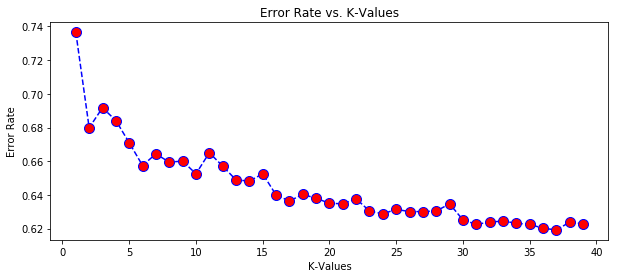

In [24]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Note the confusion (off-diagonal nonzero elements) between Iris species 2 and species 3. For comparison, we look at the confusion matrix when $k = 3$. Firstly, we try with all the training data (not holding any observations back for a test set).

In [25]:
knn3 = KNeighborsClassifier(n_neighbors=37)
knn3.fit(X, y)
y_pred3 = knn3.predict(X)
print(accuracy_score(y, y_pred3))
print(confusion_matrix(y, y_pred3))
print(classification_report(y, y_pred3, digits=3))

0.42253660466956866
[[ 283  368  744    9    0    0    0    0    0]
 [ 165 2087  940   99    0    0    0    0    0]
 [ 230  958 1614   15    0    0    0    0    0]
 [  28  720  249  202    0   47    0    0    0]
 [  36  127  107    1    0    0    0    0    0]
 [   1   42   13   60    0   85    0    0    0]
 [  22  278  156    4    0    0    0    0    0]
 [  62   70  123    0    0    0    0    0    0]
 [   9   74   43   14    0   23    0    0    0]]
              precision    recall  f1-score   support

           1      0.339     0.202     0.253      1404
           2      0.442     0.634     0.521      3291
           3      0.405     0.573     0.474      2817
           4      0.500     0.162     0.245      1246
           5      0.000     0.000     0.000       271
           6      0.548     0.423     0.478       201
           7      0.000     0.000     0.000       460
           8      0.000     0.000     0.000       255
           9      0.000     0.000     0.000       163

   mi

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Note that 6 observations (3 each of species 2 and 3) are not classified the same as the human experts. However, this might also indicate something interesting about those observations. They could be outliers (not classified correctly) but, at the very least, they are extreme observations.

Now we try holding back 20% of the training set for use as test observations, leaving 80% of the training data to train the classifier. We then look at what happens to the confusion matrix. Note that sampling the data like this could result in *better* relative performance, depending on what happens to the 6 problematic observations.

In [26]:
knn3.fit(Xtrain, ytrain)
ypred3s = knn3.predict(Xtest)
print(accuracy_score(ytest, ypred3s))
print(confusion_matrix(ytest, ypred3s))
print(classification_report(ytest, ypred3s, digits=3))

0.380811078140455
[[ 61 155 205   0   0   0   0   0   0]
 [ 64 644 242  38   0   0   0   0   0]
 [ 85 385 369   6   0   0   0   0   0]
 [  6 228  66  57   0  17   0   0   0]
 [  8  41  32   0   0   0   0   0   0]
 [  0  15   6  15   0  24   0   0   0]
 [ 11  85  42   0   0   0   0   0   0]
 [ 18  20  39   0   0   0   0   0   0]
 [  4  27   7   3   0   8   0   0   0]]
              precision    recall  f1-score   support

           1      0.237     0.145     0.180       421
           2      0.403     0.652     0.498       988
           3      0.366     0.437     0.398       845
           4      0.479     0.152     0.231       374
           5      0.000     0.000     0.000        81
           6      0.490     0.400     0.440        60
           7      0.000     0.000     0.000       138
           8      0.000     0.000     0.000        77
           9      0.000     0.000     0.000        49

   micro avg      0.381     0.381     0.381      3033
   macro avg      0.219     0.198 

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
